# How I Met Your Mother Character Analysis

## Importaciones

In [3]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import nltk
import re

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

## Web Scraping

Links a los dialogos de la primera temporada

In [4]:
links_temp1=["https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11508","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11515",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11516","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11514",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11513","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11512",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11511","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11510",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11509","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11506",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11505","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11517",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11507","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11518",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11519","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11520",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11521","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11522",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11661","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11662",
             "https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11664","https://transcripts.foreverdreaming.org/viewtopic.php?f=177&t=11665"]


Recorremos los links y añadimos el texto a la variable texto_capitulos

In [5]:
texto_capitulos=[]
for i in links_temp1:
    url = i
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    texto=[i.text for i in soup.find('div', class_='postbody').find_all("p")]
    texto_capitulos.append(texto)

Definimos funcion para limpiar el texto

In [6]:
def limpiar_string(string):
    regex = r"(.*?)"  #Elimina texto entre parentesis
    string = re.sub(regex, '', string) 
    regex2=r"\d|[^\w\s]" # Elimina signos y números 
    string = re.sub(regex2, '', string) 
    string = " ".join(string.split()) #Elimina dobles espacios
    string = string.lower()
    return string

Aplicamos limpiar el texto a la variable texto_capitulos que incluye todo el texto

In [7]:
for num_capitulo in texto_capitulos:
    for dialogo_cap in num_capitulo:
        limpio=limpiar_string(dialogo_cap)
        dialogo_cap=limpio
texto_capitulos

[['Pilot',
  'Scene One',
  '[Title: The Year 2030]',
  "Narrator: Kids, I'm going to tell you an incredible story. The story of how I met your mother",
  'Son: Are we being punished for something?',
  'Narrator: No',
  'Daughter: Yeah, is this going to take a while?',
  'Narrator: Yes. (Kids are annoyed) Twenty-five years ago, before I was dad, I had this whole other life.',
  '(Music Plays, Title "How I Met Your Mother" appears)',
  'Narrator: It was way back in 2005. I was twenty-seven just starting to make it as an architect and living in New York with my friend Marshall, my best friend from college. My life was good and then Uncle Marshall went and screwed the whole thing up.',
  'Marshall: (Opens ring) Will you marry me.',
  "Ted: Yes, perfect! And then you're engaged, you pop the champagne! You drink a toast! You have s*x on the kitchen floor... Don't have s*x on our kitchen floor.",
  'Marshall: Got it. Thanks for helping me plan this out, Ted.',
  "Ted: Dude, are you kidding? 

Separamos el texto por personaje

In [8]:
lineas_Ted=[]
lineas_Robin=[]
lineas_Marshall=[]
lineas_Lily=[]
lineas_Barney=[]

for j in range(22):
    for linea in texto_capitulos[j]:
        Ted_inter=[]
        Robin_inter=[]
        Marshall_inter=[]
        Lily_inter=[]
        Barney_inter=[]
        if "Ted:" in linea:
            Ted_inter.append(linea.replace("Ted: ",""))
            lineas_Ted.append(Ted_inter)
        elif "Robin:" in linea:
            Robin_inter.append(linea.replace("Robin: ",""))
            lineas_Robin.append(Robin_inter)
        elif "Marshall:" in linea:
            Marshall_inter.append(linea.replace("Marshall: ",""))
            lineas_Marshall.append(Marshall_inter)
        elif "Lily:" in linea:
            Lily_inter.append(linea.replace("Lily: ",""))
            lineas_Lily.append(Lily_inter)
        elif "Barney:" in linea:
            Barney_inter.append(linea.replace("Barney: ",""))
            lineas_Barney.append(Barney_inter)

In [9]:
lineas_Ted2 = [i[0] for i in lineas_Ted]
lineas_Robin2 = [i[0] for i in lineas_Robin]
lineas_Marshall2 = [i[0] for i in lineas_Marshall]
lineas_Lily2 = [i[0] for i in lineas_Lily]
lineas_Barney2 = [i[0] for i in lineas_Barney]

In [10]:
len(lineas_Barney2)

782

In [11]:
tedd = []
aux = []
for i in range(len(lineas_Ted2)):
    if i%14==0:
        tedd.append(aux)
        aux = []
    aux.append(lineas_Ted2[i])
    
    
robinn = []
aux2 = []
for i in range(len(lineas_Robin2)):
    if i%7==0:
        robinn.append(aux2)
        aux2 = list()
    aux2.append(lineas_Robin2[i])
    
    
marshall = list()
aux3 = list()
for i in range(len(lineas_Marshall2)):
    if i%8==0:
        marshall.append(aux3)
        aux3 = list()
    aux3.append(lineas_Marshall2[i])
    

lily = list()
aux4 = list()
for i in range(len(lineas_Lily2)):
    if i%8==0:
        lily.append(aux4)
        aux4 = list()
    aux4.append(lineas_Lily2[i])
    

    

barney = list()
aux5 = list()
for i in range(len(lineas_Barney2)):
    if i%8==0:
        barney.append(aux5)
        aux5 = list()
    aux5.append(lineas_Barney2[i])

In [12]:
print(len(tedd),len(robinn),len(lily),len(marshall),len(barney))

104 99 96 97 98


Creamos el dataframe concatenando las frases de cada personaje e indicando a que personaje pertenece

In [13]:
df=pd.DataFrame([''.join(i) for i in tedd])

In [14]:
df1=pd.DataFrame([''.join(i) for i in robinn])

In [15]:
df2=pd.DataFrame([''.join(i) for i in lily])

In [16]:
df3=pd.DataFrame([''.join(i) for i in marshall])

In [17]:
df4=pd.DataFrame([''.join(i) for i in barney])

In [18]:
listated=['Ted']*104
listarobin=['Robin']*99
listalily=['Lily']*96
listamar=['Marshall']*97
listabarney=['Barney']*98

listatotal=listated+listarobin+listalily+listamar+listabarney

In [19]:
df_frases = pd.concat([df,df1,df2,df3,df4],axis=0)
df_frases.rename(columns={0: "Frase"}, inplace=True)
df_frases['Personaje']=listatotal
df_frases

Frase Personaje
0                                                           Ted
1   Yes, perfect! And then you're engaged, you pop...       Ted
2   I'm so happy for Marshall, I really am. I just...       Ted
3   That's going to take a week?Uh, I know this is...       Ted
4   What? I did not chicken out! You know what? I ...       Ted
..                                                ...       ...
93  Butterfield is going to retaliate within the n...    Barney
94  Anything, bro.No.What are you doing in Duchess...    Barney
95  Of course we are. Were you going to think of t...    Barney
96  Ted, do you want me to slap you again? 'Cause ...    Barney
97  Come on, I know it didn't work out between us,...    Barney

[494 rows x 2 columns]

Creamos nueva columna tokenizando la columna Frase

In [20]:
df_frases['Frase limpio']=df_frases['Frase'].apply(lambda x:nltk.word_tokenize(x)).apply(lambda x: x if x not in nltk.corpus.stopwords.words("english") and len(x)>1 else np.nan)
df_frases

Frase Personaje  \
0                                                           Ted   
1   Yes, perfect! And then you're engaged, you pop...       Ted   
2   I'm so happy for Marshall, I really am. I just...       Ted   
3   That's going to take a week?Uh, I know this is...       Ted   
4   What? I did not chicken out! You know what? I ...       Ted   
..                                                ...       ...   
93  Butterfield is going to retaliate within the n...    Barney   
94  Anything, bro.No.What are you doing in Duchess...    Barney   
95  Of course we are. Were you going to think of t...    Barney   
96  Ted, do you want me to slap you again? 'Cause ...    Barney   
97  Come on, I know it didn't work out between us,...    Barney   

                                         Frase limpio  
0                                                 NaN  
1   [Yes, ,, perfect, !, And, then, you, 're, enga...  
2   [I, 'm, so, happy, for, Marshall, ,, I, really...  
3   [That, 's, going, to, take, a, week, ?, Uh, ,,...  
4   [What, ?, I, did, not, chicken, out, !, You, k...  
..                                                ...  
93  [Butterfield, is, going, to, retaliate, within...  
94  [Anything, ,, bro.No.What, are, you, doing, in...  
95  [Of, course, we, are, ., Were, you, going, to,...  
96  [Ted, ,, do, you, want, me, to, slap, you, aga...  
97  [Come, on, ,, I, know, it, did, n't, work, out...  

[494 rows x 3 columns]

Eliminamos filas que contengan Nan (1 por cada personaje)

In [21]:
df_frases.dropna(axis=0,inplace=True)
df_frases

Frase Personaje  \
1   Yes, perfect! And then you're engaged, you pop...       Ted   
2   I'm so happy for Marshall, I really am. I just...       Ted   
3   That's going to take a week?Uh, I know this is...       Ted   
4   What? I did not chicken out! You know what? I ...       Ted   
5   (Exhales) Okay. Moment of truth. Wish me luck....       Ted   
..                                                ...       ...   
93  Butterfield is going to retaliate within the n...    Barney   
94  Anything, bro.No.What are you doing in Duchess...    Barney   
95  Of course we are. Were you going to think of t...    Barney   
96  Ted, do you want me to slap you again? 'Cause ...    Barney   
97  Come on, I know it didn't work out between us,...    Barney   

                                         Frase limpio  
1   [Yes, ,, perfect, !, And, then, you, 're, enga...  
2   [I, 'm, so, happy, for, Marshall, ,, I, really...  
3   [That, 's, going, to, take, a, week, ?, Uh, ,,...  
4   [What, ?, I, did, not, chicken, out, !, You, k...  
5   [(, Exhales, ), Okay, ., Moment, of, truth, .,...  
..                                                ...  
93  [Butterfield, is, going, to, retaliate, within...  
94  [Anything, ,, bro.No.What, are, you, doing, in...  
95  [Of, course, we, are, ., Were, you, going, to,...  
96  [Ted, ,, do, you, want, me, to, slap, you, aga...  
97  [Come, on, ,, I, know, it, did, n't, work, out...  

[489 rows x 3 columns]

Creamos el corpus

In [22]:
corpus=df_frases['Frase'].sum()
corpus

'Yes, perfect! And then you\'re engaged, you pop the champagne! You drink a toast! You have s*x on the kitchen floor... Don\'t have s*x on our kitchen floor.Dude, are you kidding? It\'s you and Lily! I\'ve been there for all the big moments of you and Lily. The night you met. Your first date... other first things.It\'s physics Marshall, if the bottom bunk moves, the top bunk moves too. My god, you\'re getting engaged tonight.Hey, you wanna do something tonight?Hey.I did that one time.You know, ever since college it\'s been Marshall and Lily and me. Now it\'s going to be Marshall and Lily... and me. They\'ll get married, start a family-before long I\'m the weird, middle-aged bachelor their kids call "Uncle Ted".Oh, right. Hi.I\'m not wearing a suit.Thirty, right. You\'re right. I guess it\'s just, you\'re best friend gets engaged-you start thinking about that stuff.You\'re my best friend, Barney.Wai-no, no, no. We\'re not playing "Have You Met Ted?"(To Yasmine) Hi, I\'m Ted.It\'s a very

In [23]:
dd=nltk.corpus.stopwords.words("english")
añadir=[".", ",", ":", ";","¡","!","¿","?",'?','&','I','\'','and']
for i in añadir:
    dd.append(i)
dd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Creamos el corpus limpio

In [24]:
corpus_limpio=[i for i in nltk.word_tokenize(corpus) if i not in dd and len(i)>1]
corpus_limpio

['Yes',
 'perfect',
 'And',
 "'re",
 'engaged',
 'pop',
 'champagne',
 'You',
 'drink',
 'toast',
 'You',
 'kitchen',
 'floor',
 '...',
 'Do',
 "n't",
 'kitchen',
 'floor.Dude',
 'kidding',
 'It',
 "'s",
 'Lily',
 "'ve",
 'big',
 'moments',
 'Lily',
 'The',
 'night',
 'met',
 'Your',
 'first',
 'date',
 '...',
 'first',
 'things.It',
 "'s",
 'physics',
 'Marshall',
 'bottom',
 'bunk',
 'moves',
 'top',
 'bunk',
 'moves',
 'My',
 'god',
 "'re",
 'getting',
 'engaged',
 'tonight.Hey',
 'wan',
 'na',
 'something',
 'tonight',
 'Hey.I',
 'one',
 'time.You',
 'know',
 'ever',
 'since',
 'college',
 "'s",
 'Marshall',
 'Lily',
 'Now',
 "'s",
 'going',
 'Marshall',
 'Lily',
 '...',
 'They',
 "'ll",
 'get',
 'married',
 'start',
 'family-before',
 'long',
 "'m",
 'weird',
 'middle-aged',
 'bachelor',
 'kids',
 'call',
 '``',
 'Uncle',
 'Ted',
 "''",
 '.Oh',
 'right',
 'Hi.I',
 "'m",
 'wearing',
 'suit.Thirty',
 'right',
 'You',
 "'re",
 'right',
 'guess',
 "'s",
 "'re",
 'best',
 'friend',
 'g

Creamos nuevo dataframe, donde las columnas seran el corpus pero solo con las palabras que no se repiten (set)

In [25]:
colum_corpus=pd.DataFrame(columns=set(corpus_limpio))

Empty DataFrame
Columns: [respect, enemy, woods, wrecks, Kathy, open, Sipping, Heart, assume, picking, Troilus, COUPLE, urge, always, Chuck, spinach, Mosby, Be, suckers, felt, no.Claudia, Seeing, fly.I, Congrats.Well, Lily.You, Like, slow.Totally, sandwich, exist.Come, put, Please-don't-leave-me, right.Hi, Millions, door.Yeah, care.Yeah, fornicators, bye, crawl, God.I, Round, dance.Oh, small, Funyuns, mixes, drunk.OK, Pete.You, struggle, ago.Lily, way.Yes.Yes, way, woman-were, clubs, VIP, mission, Dude, brown, lled.It, recruit, Realizing, Nah.I, answering, Much, would, while.Well, guilty, peeks, sofa, lottery.I, boundaries, near, Hansel, Love, catch, Wipes, biggest, pictures, WILL, up.You, thing.Two, song.Oh, tray, Lily.Oh, BOO, there.Thank, hot.Arr-gyle.Arrr-by'sIt, Four, feet.Is, Make, Hey, joyous, Ed's.No, fifteen, blue, better.That, AGAIN, Brooklyn, know.Oh, Told, bear, Samantha, ...]
Index: []

[0 rows x 7355 columns]

Rellenamos la matriz con 0 y 1 para cada documento segun aparezca o no la palabra

In [26]:
corpus_set=set(corpus_limpio)

In [27]:
lista = []

for palabra in corpus_set:
    aux=[]
    for i in df_frases['Frase limpio']:
        if palabra in i:
            aux.append(1)
        else:
            aux.append(0)
    lista.append(aux)
lista

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [28]:
len(lista[0])

489

Añadimos esta lista al dataframe anterior

In [29]:
colum_corpus=pd.DataFrame(lista).T
colum_corpus.columns=corpus_set
colum_corpus

respect  enemy  woods  wrecks  Kathy  open  Sipping  Heart  assume  \
0          0      0      0       0      0     0        0      0       0   
1          0      0      0       0      0     0        0      0       0   
2          0      0      0       0      0     0        0      0       0   
3          0      0      0       0      0     0        0      0       0   
4          0      0      0       0      0     0        0      0       0   
..       ...    ...    ...     ...    ...   ...      ...    ...     ...   
484        0      0      0       0      0     0        0      0       0   
485        0      0      0       0      0     0        0      0       0   
486        0      0      0       0      0     0        0      0       0   
487        0      0      0       0      0     0        0      0       0   
488        0      0      0       0      0     0        0      0       0   

     picking  ...  I-forgive-you  Lily.Who  Sorry.I  proven  style  worked.We  \
0          0  ...              0         0        0       0      0          0   
1          0  ...              0         0        0       0      0          0   
2          0  ...              0         0        0       0      0          0   
3          0  ...              0         0        0       0      0          0   
4          0  ...              0         0        0       0      0          0   
..       ...  ...            ...       ...      ...     ...    ...        ...   
484        0  ...              0         0        0       0      0          0   
485        0  ...              0         0        0       0      0          0   
486        0  ...              0         0        0       0      0          0   
487        0  ...              0         0        0       0      0          0   
488        0  ...              0         0        0       0      0          0   

     dated  trained.Just  Led  reasonable.Barney  
0        0             0    0                  0  
1        0             0    0                  0  
2        0             0    0                  0  
3        0             0    0                  0  
4        0             0    0                  0  
..     ...           ...  ...                ...  
484      0             0    0                  0  
485      0             0    0                  0  
486      0             0    0                  0  
487      0             0    0                  0  
488      0             0    0                  0  

[489 rows x 7355 columns]

Vamos a calcular la matriz con tf x idf


Las ecuaciones para idf y tf-idf implementadas en XXX son: 

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

In [30]:
lista_dfs=list()
for colu in colum_corpus.columns:
    lista_dfs.append(colum_corpus[colum_corpus[colu] != 0].shape[0])

In [31]:
lista_dfs

[1,
 1,
 2,
 1,
 2,
 7,
 1,
 2,
 1,
 5,
 1,
 1,
 1,
 39,
 1,
 1,
 4,
 1,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 22,
 1,
 1,
 1,
 0,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 64,
 1,
 4,
 5,
 1,
 14,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 66,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 9,
 8,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 77,
 1,
 1,
 5,
 5,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 4,
 2,
 1,
 2,
 2,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 11,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 3,
 1,
 1,
 5,
 6,
 1,
 1,
 7,
 1,
 1,
 2,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 0,
 1,
 10,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 4,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 1,
 11,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 16,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 15,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 135,
 1,
 1,
 1,
 1,
 1,
 1

In [32]:
for fila in range(489):
    for colu in range(7355):
        colum_corpus.iloc[fila,colu] = colum_corpus.iloc[fila,colu]* np.log((490)/(1+lista_dfs[colu]))
                                        
colum_corpus

respect  enemy  woods  wrecks  Kathy  open  Sipping  Heart  assume  \
0        0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
1        0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
2        0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
3        0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
4        0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
..       ...    ...    ...     ...    ...   ...      ...    ...     ...   
484      0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
485      0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
486      0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
487      0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   
488      0.0    0.0    0.0     0.0    0.0   0.0      0.0    0.0     0.0   

     picking  ...  I-forgive-you  Lily.Who  Sorry.I  proven  style  worked.We  \
0        0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
1        0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
2        0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
3        0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
4        0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
..       ...  ...            ...       ...      ...     ...    ...        ...   
484      0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
485      0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
486      0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
487      0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
488      0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   

     dated  trained.Just  Led  reasonable.Barney  
0      0.0           0.0  0.0                0.0  
1      0.0           0.0  0.0                0.0  
2      0.0           0.0  0.0                0.0  
3      0.0           0.0  0.0                0.0  
4      0.0           0.0  0.0                0.0  
..     ...           ...  ...                ...  
484    0.0           0.0  0.0                0.0  
485    0.0           0.0  0.0                0.0  
486    0.0           0.0  0.0                0.0  
487    0.0           0.0  0.0                0.0  
488    0.0           0.0  0.0                0.0  

[489 rows x 7355 columns]

Vemos los percentiles

In [33]:
colum_corpus.sum().describe(percentiles=[0.01,0.90])

count    7355.000000
mean       11.830881
std        19.197976
min         0.000000
1%          0.000000
50%         5.501258
90%        22.013230
max       178.966112
dtype: float64

Quitamos el percentil superior

In [34]:
colum_corpus.drop(list(colum_corpus.sum()[colum_corpus.sum()>22].index),axis=1)


respect  enemy  woods  wrecks  Kathy  Sipping  Heart  assume  Troilus  \
0        0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
1        0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
2        0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
3        0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
4        0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
..       ...    ...    ...     ...    ...      ...    ...     ...      ...   
484      0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
485      0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
486      0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
487      0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   
488      0.0    0.0    0.0     0.0    0.0      0.0    0.0     0.0      0.0   

     COUPLE  ...  I-forgive-you  Lily.Who  Sorry.I  proven  style  worked.We  \
0       0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
1       0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
2       0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
3       0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
4       0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
..      ...  ...            ...       ...      ...     ...    ...        ...   
484     0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
485     0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
486     0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
487     0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   
488     0.0  ...            0.0       0.0      0.0     0.0    0.0        0.0   

     dated  trained.Just  Led  reasonable.Barney  
0      0.0           0.0  0.0                0.0  
1      0.0           0.0  0.0                0.0  
2      0.0           0.0  0.0                0.0  
3      0.0           0.0  0.0                0.0  
4      0.0           0.0  0.0                0.0  
..     ...           ...  ...                ...  
484    0.0           0.0  0.0                0.0  
485    0.0           0.0  0.0                0.0  
486    0.0           0.0  0.0                0.0  
487    0.0           0.0  0.0                0.0  
488    0.0           0.0  0.0                0.0  

[489 rows x 6547 columns]

Aplicamos PCA para reducir dimensiones (columnas=palabras unicas) y quedarnos con las relevantes

## PCA

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

Escalamos los datos

In [36]:
scaler=StandardScaler().fit(colum_corpus)
datita=scaler.transform(colum_corpus)
datita = pd.DataFrame(datita, columns=colum_corpus.columns)
datita

respect     enemy     woods    wrecks     Kathy      open   Sipping  \
0   -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
1   -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
2   -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
3   -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
4   -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
..        ...       ...       ...       ...       ...       ...       ...   
484 -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
485 -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
486 -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
487 -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   
488 -0.045268 -0.045268 -0.064084 -0.045268 -0.064084 -0.120511 -0.045268   

        Heart    assume   picking  ...  I-forgive-you  Lily.Who   Sorry.I  \
0   -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
1   -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
2   -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
3   -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
4   -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
..        ...       ...       ...  ...            ...       ...       ...   
484 -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
485 -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
486 -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
487 -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   
488 -0.064084 -0.045268 -0.101639  ...      -0.045268 -0.045268 -0.045268   

       proven     style  worked.We     dated  trained.Just       Led  \
0   -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
1   -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
2   -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
3   -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
4   -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
..        ...       ...        ...       ...           ...       ...   
484 -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
485 -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
486 -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
487 -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   
488 -0.045268 -0.064084  -0.045268 -0.090815     -0.045268 -0.064084   

     reasonable.Barney  
0            -0.045268  
1            -0.045268  
2            -0.045268  
3            -0.045268  
4            -0.045268  
..                 ...  
484          -0.045268  
485          -0.045268  
486          -0.045268  
487          -0.045268  
488          -0.045268  

[489 rows x 7355 columns]

Hacemos PCA con todas las columnas para ver con cuantas variables nos quedamos (que expliquen al menos el 90%)

In [37]:
pca = PCA()
pca = pca.fit(datita)
# función transform que nos transforma los datos en las nuevas componentes
print(pca.components_.round(3))

#si pusiesemos n_componentes=3 saldria un 3x6, donde 4 son las nuevas dimensiones y 6 las dimensiones orginales

[[-0.001 -0.    -0.001 ... -0.    -0.001 -0.   ]
 [-0.001 -0.    -0.    ...  0.    -0.     0.   ]
 [-0.003 -0.001 -0.    ... -0.001  0.005 -0.001]
 ...
 [ 0.001 -0.     0.    ... -0.001  0.    -0.002]
 [ 0.001  0.001  0.001 ...  0.001 -0.001 -0.002]
 [-0.587  0.122  0.052 ... -0.001 -0.001  0.001]]


In [38]:
pca.explained_variance_ratio_

array([1.03524028e-02, 7.29888578e-03, 5.42200738e-03, 5.00415633e-03,
       4.90564459e-03, 4.64553235e-03, 4.61752084e-03, 4.59631100e-03,
       4.53165930e-03, 4.42593769e-03, 4.40970664e-03, 4.33806821e-03,
       4.29890300e-03, 4.27038836e-03, 4.20952962e-03, 4.18155992e-03,
       4.17228026e-03, 4.15547107e-03, 4.13403158e-03, 4.09547643e-03,
       4.07617621e-03, 4.06419894e-03, 4.03827610e-03, 4.00298445e-03,
       3.98876077e-03, 3.94528045e-03, 3.91929460e-03, 3.90209249e-03,
       3.88142940e-03, 3.84785063e-03, 3.83075538e-03, 3.80167048e-03,
       3.79474510e-03, 3.78550096e-03, 3.77030099e-03, 3.71923033e-03,
       3.69851825e-03, 3.67409063e-03, 3.65606144e-03, 3.65349958e-03,
       3.64875377e-03, 3.58409908e-03, 3.56834983e-03, 3.54027849e-03,
       3.53137810e-03, 3.48635492e-03, 3.47190692e-03, 3.45266594e-03,
       3.44526273e-03, 3.43369560e-03, 3.42384324e-03, 3.40110078e-03,
       3.36053293e-03, 3.34111390e-03, 3.33539205e-03, 3.32481285e-03,
      

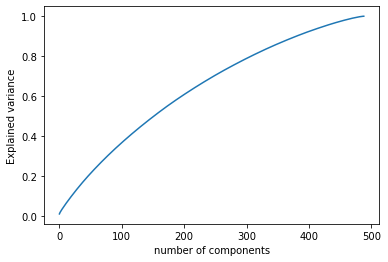

In [39]:
#Opcion b: graficar explained variance acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

Nos quedamos 400 columnas 

In [40]:
pca = PCA(n_components=400)
pca = pca.fit(datita)
# función transform que nos transforma los datos en las nuevas componentes
print(pca.components_.round(3))

#si pusiesemos n_componentes=3 saldria un 3x6, donde 4 son las nuevas dimensiones y 6 las dimensiones orginales

[[-0.001 -0.    -0.001 ... -0.    -0.001 -0.   ]
 [-0.001 -0.    -0.    ...  0.    -0.     0.   ]
 [-0.003 -0.001 -0.    ... -0.001  0.005 -0.001]
 ...
 [ 0.001  0.001 -0.002 ...  0.008 -0.002 -0.009]
 [-0.    -0.004  0.002 ... -0.013 -0.004 -0.001]
 [-0.002 -0.    -0.    ... -0.026 -0.002 -0.004]]


In [41]:
datita_transformado=pca.transform(datita)
datita_transformado

array([[-8.72151161e-01, -3.56501666e-01,  8.20137382e-01, ...,
         1.73885290e-01,  2.23707416e-01,  4.18815536e-03],
       [ 1.19026627e+00,  1.05231486e+00,  1.11961636e+00, ...,
         3.00542056e-01,  1.72551549e-01, -1.30048584e-01],
       [-8.46256985e-01, -4.07769021e-01,  7.33290651e-01, ...,
         1.93317157e-01,  2.13477282e-01,  2.82394358e-01],
       ...,
       [-5.83593631e-01, -1.52223943e-01, -4.37686029e-01, ...,
        -3.46061774e-01,  4.24518291e-01, -8.15046342e-01],
       [-5.93877470e-01, -4.80280674e-02, -7.59377654e-01, ...,
         1.89641361e+01, -4.85146315e+00,  3.26411791e+01],
       [-4.74117917e-01,  4.18652843e-02, -7.02302290e-01, ...,
        -9.16119338e+00, -4.21469265e+00, -7.00571400e+00]])

## Hacemos Kmeans

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

Definimos X

In [43]:
datita_trans_df = pd.DataFrame(datita_transformado)
datita_trans_df

0         1         2         3         4          5          6    \
0   -0.872151 -0.356502  0.820137  0.034069 -1.890559   0.694410   1.858550   
1    1.190266  1.052315  1.119616  3.177003 -5.156051  14.066044  12.374578   
2   -0.846257 -0.407769  0.733291  0.243793 -0.392805   0.775699   3.416126   
3    0.899392 -1.776562 -1.142266  2.956433 -2.086338   3.256756   4.335875   
4   -0.995249 -0.400069 -1.132277  1.747149 -1.270635   2.541512   4.965938   
..        ...       ...       ...       ...       ...        ...        ...   
484 -0.470010 -0.277198 -0.491907  1.128734  0.829010  -1.265613  -1.581949   
485 -0.520317  0.038084 -0.848694 -1.263740 -0.257549   0.035063  -0.879526   
486 -0.583594 -0.152224 -0.437686 -1.910529 -0.977061  -0.964597  -2.093011   
487 -0.593877 -0.048028 -0.759378 -0.667017 -0.365443  -0.621164   0.267044   
488 -0.474118  0.041865 -0.702302 -0.899937 -0.346778  -0.870988  -1.229513   

           7         8          9    ...       390        391       392  \
0    -2.041149 -0.146059   4.655730  ...  0.214651  -0.082059  0.215902   
1   -13.687071  4.358055  34.617429  ... -0.075478   0.225577 -0.546325   
2     2.720354 -1.683235  -1.065469  ... -0.304510  -0.149188  0.459693   
3     1.698134 -0.217179   6.030314  ... -0.106819  -0.579273 -0.294553   
4     3.106001  0.859259   3.080684  ...  0.440079   0.396774 -0.730440   
..         ...       ...        ...  ...       ...        ...       ...   
484   3.678926 -0.435760  -2.702758  ...  0.020295   0.065071 -0.198580   
485   0.122262 -0.746588  -1.318642  ...  0.037708  -1.932705  3.887520   
486  -0.051892 -3.450632  -1.619154  ...  0.107193   1.009604  0.036343   
487  -0.997873 -0.408950  -0.900815  ...  7.857992 -10.215793 -4.009105   
488   0.368682 -0.819084  -0.709702  ... -3.678301  -1.049315 -4.387244   

          393       394       395       396        397       398        399  
0    0.522158  0.066856  0.150742  0.288880   0.173885  0.223707   0.004188  
1    0.675185  0.407672  0.008601  0.227192   0.300542  0.172552  -0.130049  
2    0.270879 -0.144071 -0.044831 -0.144064   0.193317  0.213477   0.282394  
3   -0.058460 -0.031489  0.136150  0.385600   0.086256  0.235730  -0.266089  
4   -0.668461 -0.117544  0.350667  0.865134   0.417301 -0.301291  -0.309962  
..        ...       ...       ...       ...        ...       ...        ...  
484  0.059204  0.050258  0.107569 -0.350678   0.033687  0.084094  -0.039810  
485 -1.474996 -1.776615  6.542324  4.681347   1.854008  0.947470  -4.755000  
486  0.289621  0.500396  0.085378 -0.693031  -0.346062  0.424518  -0.815046  
487 -4.628972 -2.307686 -5.794574  3.145680  18.964136 -4.851463  32.641179  
488  6.897001 -2.656449 -3.844681 -3.866873  -9.161193 -4.214693  -7.005714  

[489 rows x 400 columns]

In [44]:
#Comenzamos probando con un número de grupos, en este ejemplo 4
kmeans = KMeans(n_clusters=6)
kmeans.fit(datita_trans_df)
y_kmeans = kmeans.predict(datita_trans_df)

#Vemos gráficamente cómo ha quedado la clasificación


#La inercia mide la semejanza entre los patrones de un cluster 

print(kmeans.inertia_)

3131125.216769479


In [45]:
df_frases['k means']=kmeans.labels_
df_frases['k means'].value_counts()

2    484
3      1
1      1
0      1
4      1
5      1
Name: k means, dtype: int64

Puta mierda, probamos otro (spoiler: va a salir otra mierda)

# Hacemos Hierarchichal Clustering

In [47]:
datita_trans_df_hier = pd.DataFrame(datita_transformado)
datita_trans_df_hier

0         1         2         3         4          5          6    \
0   -0.872151 -0.356502  0.820137  0.034069 -1.890559   0.694410   1.858550   
1    1.190266  1.052315  1.119616  3.177003 -5.156051  14.066044  12.374578   
2   -0.846257 -0.407769  0.733291  0.243793 -0.392805   0.775699   3.416126   
3    0.899392 -1.776562 -1.142266  2.956433 -2.086338   3.256756   4.335875   
4   -0.995249 -0.400069 -1.132277  1.747149 -1.270635   2.541512   4.965938   
..        ...       ...       ...       ...       ...        ...        ...   
484 -0.470010 -0.277198 -0.491907  1.128734  0.829010  -1.265613  -1.581949   
485 -0.520317  0.038084 -0.848694 -1.263740 -0.257549   0.035063  -0.879526   
486 -0.583594 -0.152224 -0.437686 -1.910529 -0.977061  -0.964597  -2.093011   
487 -0.593877 -0.048028 -0.759378 -0.667017 -0.365443  -0.621164   0.267044   
488 -0.474118  0.041865 -0.702302 -0.899937 -0.346778  -0.870988  -1.229513   

           7         8          9    ...       390        391       392  \
0    -2.041149 -0.146059   4.655730  ...  0.214651  -0.082059  0.215902   
1   -13.687071  4.358055  34.617429  ... -0.075478   0.225577 -0.546325   
2     2.720354 -1.683235  -1.065469  ... -0.304510  -0.149188  0.459693   
3     1.698134 -0.217179   6.030314  ... -0.106819  -0.579273 -0.294553   
4     3.106001  0.859259   3.080684  ...  0.440079   0.396774 -0.730440   
..         ...       ...        ...  ...       ...        ...       ...   
484   3.678926 -0.435760  -2.702758  ...  0.020295   0.065071 -0.198580   
485   0.122262 -0.746588  -1.318642  ...  0.037708  -1.932705  3.887520   
486  -0.051892 -3.450632  -1.619154  ...  0.107193   1.009604  0.036343   
487  -0.997873 -0.408950  -0.900815  ...  7.857992 -10.215793 -4.009105   
488   0.368682 -0.819084  -0.709702  ... -3.678301  -1.049315 -4.387244   

          393       394       395       396        397       398        399  
0    0.522158  0.066856  0.150742  0.288880   0.173885  0.223707   0.004188  
1    0.675185  0.407672  0.008601  0.227192   0.300542  0.172552  -0.130049  
2    0.270879 -0.144071 -0.044831 -0.144064   0.193317  0.213477   0.282394  
3   -0.058460 -0.031489  0.136150  0.385600   0.086256  0.235730  -0.266089  
4   -0.668461 -0.117544  0.350667  0.865134   0.417301 -0.301291  -0.309962  
..        ...       ...       ...       ...        ...       ...        ...  
484  0.059204  0.050258  0.107569 -0.350678   0.033687  0.084094  -0.039810  
485 -1.474996 -1.776615  6.542324  4.681347   1.854008  0.947470  -4.755000  
486  0.289621  0.500396  0.085378 -0.693031  -0.346062  0.424518  -0.815046  
487 -4.628972 -2.307686 -5.794574  3.145680  18.964136 -4.851463  32.641179  
488  6.897001 -2.656449 -3.844681 -3.866873  -9.161193 -4.214693  -7.005714  

[489 rows x 400 columns]

In [48]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(datita_trans_df_hier,datita_trans_df_hier) 
print(dist_matrix, dist_matrix.shape)

[[  0.         155.48788855 144.76136792 ... 145.61825967 114.8794593
  108.35643196]
 [155.48788855   0.         156.41583426 ... 156.86302768 128.47488868
  123.23288264]
 [144.76136792 156.41583426   0.         ... 145.8417024  114.30325293
  107.79217739]
 ...
 [145.61825967 156.86302768 145.8417024  ...   0.         113.07149724
  108.21654289]
 [114.8794593  128.47488868 114.30325293 ... 113.07149724   0.
   65.80274252]
 [108.35643196 123.23288264 107.79217739 ... 108.21654289  65.80274252
    0.        ]] (489, 489)


In [49]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'complete')

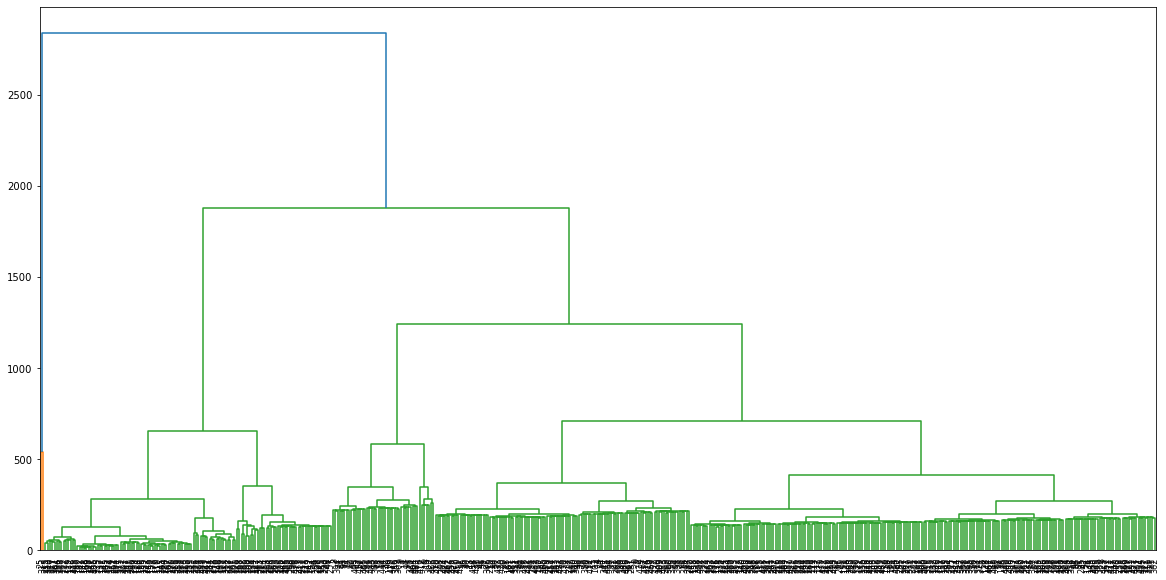

In [50]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

In [54]:
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'average')

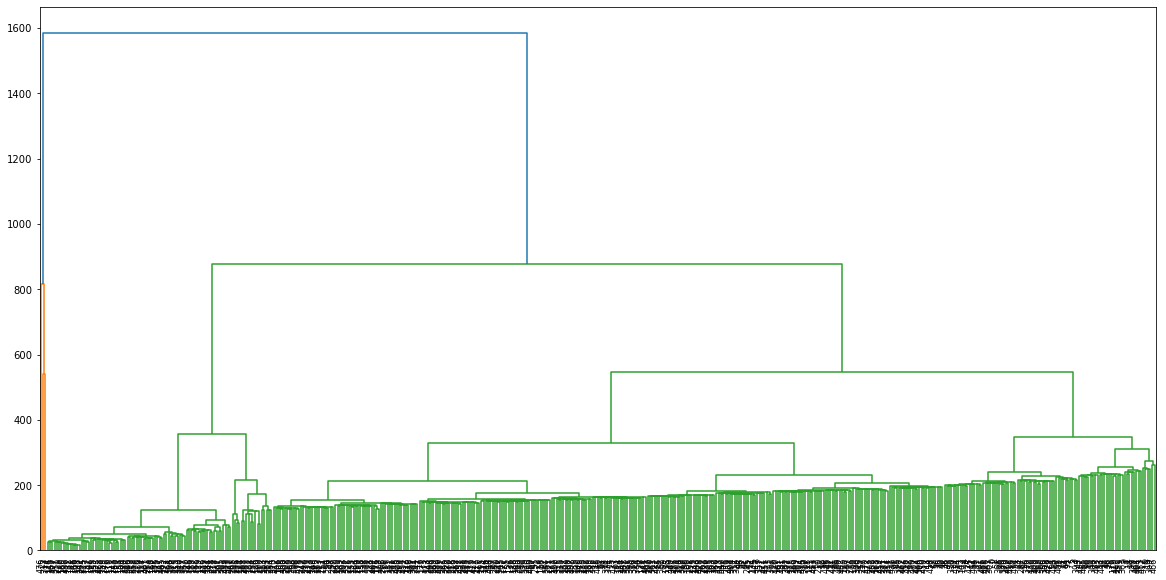

In [55]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

In [56]:
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'single')

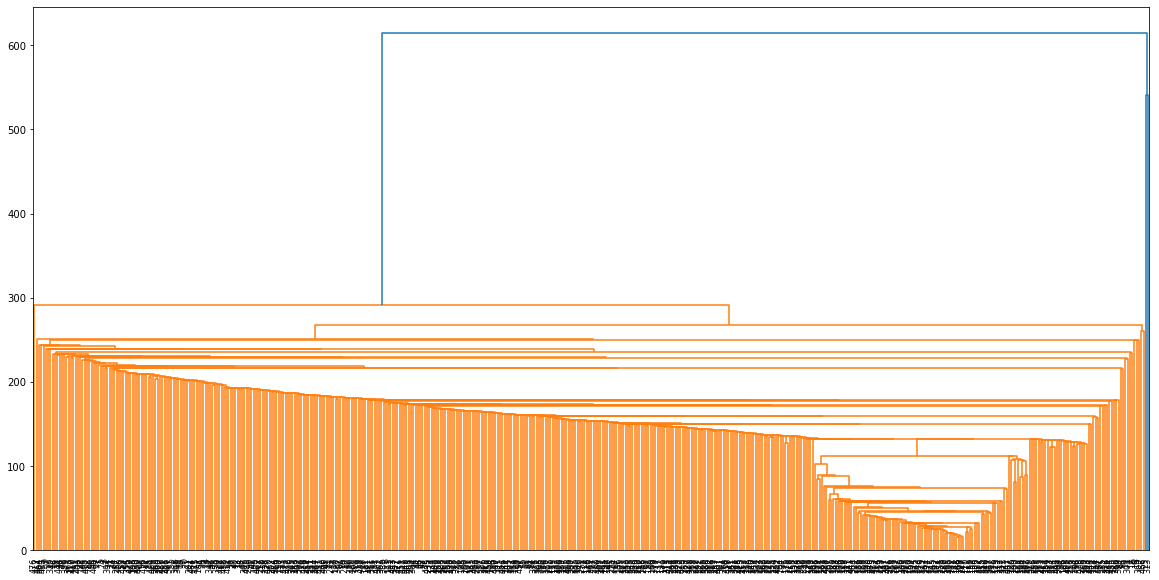

In [57]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

In [60]:
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'centroid')

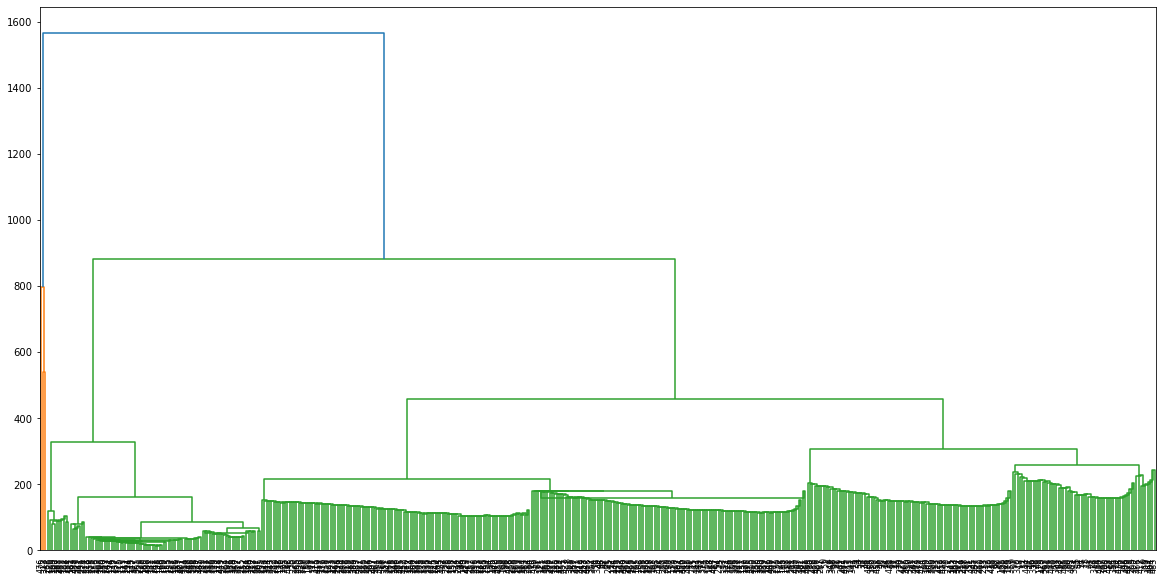

In [61]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

No hay ningún tipo de dendrograma que nos clasifique con 5 grupos